In [3]:
from IPython.display import SVG, Image, HTML

#Image('assets/cards/title.png', retina=True)

# From SVG to the screen

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib
matplotlib.rcParams['animation.html'] = 'html5'
from matplotlib import pyplot as plt

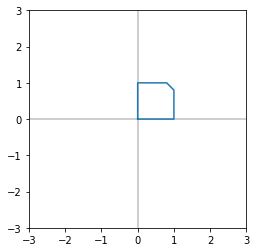

In [6]:
coords = np.array([
    [0, 0, 0.8, 1,   1, 0],
    [0, 1, 1,   0.8, 0, 0]
])


plt.axes().set_aspect('equal')
plt.axis(xmin=-3, xmax=3, ymin=-3, ymax=3)
plt.axvline(color='silver')
plt.axhline(color='silver')
plt.plot(*coords);

In [7]:
c2 = np.concatenate([coords, [np.ones(coords.shape[1])]])
c2

array([[0. , 0. , 0.8, 1. , 1. , 0. ],
       [0. , 1. , 1. , 0.8, 0. , 0. ],
       [1. , 1. , 1. , 1. , 1. , 1. ]])

In [8]:
# SVG attribute transform="matrix(-0.98891076,-0.14851095,-0.14851095,0.98891076,2.2,1.5)"

a, b, c, d, e, f = -0.98891076, -0.14851095, -0.14851095, 0.98891076, 2.2, 1.5

xform = np.array([
    [a, c, e],
    [b, d, f],
])

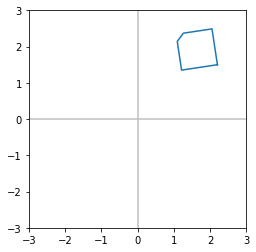

In [9]:
xs, ys = xform @ c2

plt.axes().set_aspect('equal')
plt.axis(xmin=-3, xmax=3, ymin=-3, ymax=3)
plt.axvline(color='silver')
plt.axhline(color='silver')
plt.plot(xs, ys);

In [10]:
(xform @ c2).T.reshape(-1)

array([2.2       , 1.5       , 2.05148905, 2.48891076, 1.26036044,
       2.370102  , 1.09228048, 2.14261766, 1.21108924, 1.35148905,
       2.2       , 1.5       ])

# Water surface

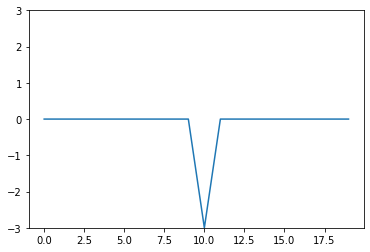

In [11]:
levels = np.zeros(20)
velocities = np.zeros(20)

levels[10] = -3

plt.axis(ymin=-3, ymax=3)
plt.plot(levels);

In [12]:
VCONV = np.array([0.05, 0.3, -0.8, 0.3, 0.05])
LCONV = np.array([0.05, 0.9, 0.05])

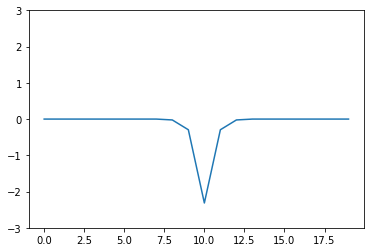

In [13]:
dt = 1 / 60

velocities += np.convolve(
    levels,
    VCONV,
    'same',
)
velocities *= 0.1 ** dt  # damp
levels = np.convolve(
    levels,
    LCONV,
    'same'
) + velocities * 10 * dt

plt.axis(ymin=-3, ymax=3)
plt.plot(levels);

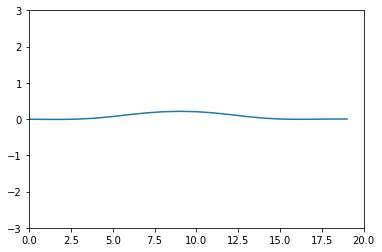

In [19]:
from matplotlib.animation import FuncAnimation

dt = 1 / 60
levels[:] = 0
levels[10] = -3

def update(frame):
    global velocities, levels
    velocities += np.convolve(
        levels,
        VCONV,
        'same',
    )
    velocities *= 0.5 ** dt
    levels = np.convolve(
        levels,
        LCONV,
        'same'
    ) + velocities * 10 * dt
    ln.set_data(range(20), levels)
    return ln,

fig, ax = plt.subplots()
ln, = ax.plot([], [], '-')

def init():
    ax.set_xlim(0, 20)
    ax.set_ylim(-3, 3)
    return ln,


FuncAnimation(fig, update, frames=np.linspace(0, 2, 120), interval=1000/60,
                    init_func=init, blit=True)

# Sept. 22, 2019 - Sept. 29, 2019.

Midnight to Midnight, UTC

Join us at <https://pyweek.org>